In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Harmonic oscillator revisited

Die Oszillatorgleichung lautet $m\cdot \ddot{x} + k\cdot x = 0$

\begin{align}
\dot{x} &= v\\
\dot{v} &= -\omega^2 x\\
\end{align}

In [21]:
# Harmonischer Oszillator
x = np.zeros(100000)
x[0] = 1./np.sqrt(2.)
v = np.zeros(100000)
v[0] = 1./np.sqrt(2.)
dt = .01
#
for i in np.arange(1,100000):
    x[i] = x[i-1] + v[i-1]*dt
    v[i] = v[i-1] - x[i]*dt

<IPython.core.display.Javascript object>


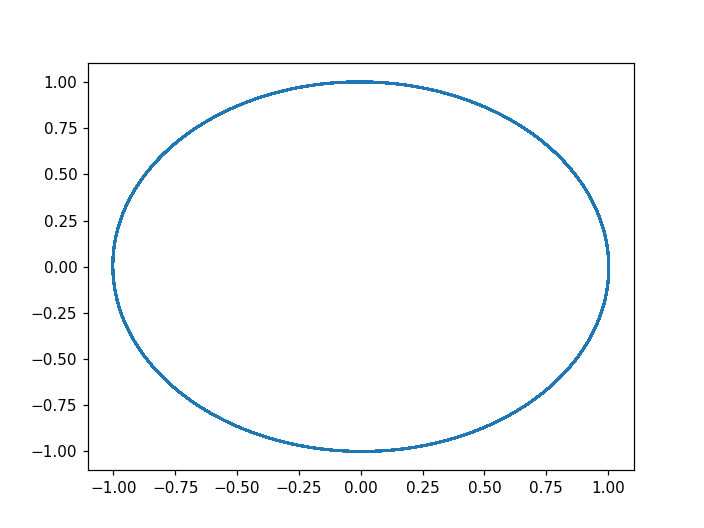

In [22]:
%matplotlib notebook
plt.plot(x,v)

In [23]:
for i in np.arange(100000,1):
    x[i-1] = x[i] - v[i]*dt
    v[i-1] = v[i] + x[i]*dt

<IPython.core.display.Javascript object>


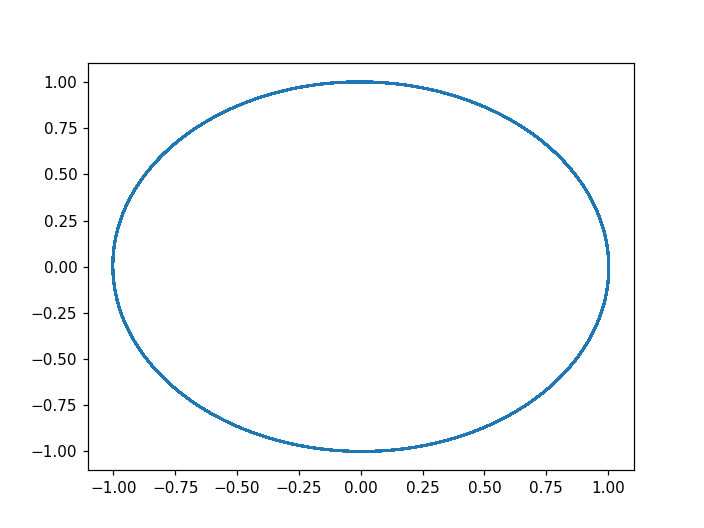

In [24]:
%matplotlib notebook
plt.plot(x,v)

In [25]:
from scipy.integrate import odeint, solve_ivp
#
def func4odeint(r,t):
    x,v=r
    # here you enter the differential equation system
    dx=v
    dv=-x
    return dx,dv
#
def func4solve_ivp(t,r):
    x,v=r
    # here you enter the differential equation system
    dx=v
    dv=-x
    return dx,dv

In [26]:
# here you integrate the DE and make a side by side plot
ti = 0.
tf = 1000.
r0=(1./np.sqrt(2.),1./np.sqrt(2.))
#
t=np.linspace(0,1000,10000)  # We do 10000 steps in the iterval [0,100]
t_eval = np.linspace(0,1000,10000)
pos = odeint(func4odeint,r0,t) # Integrate the system of differential equations
sol = solve_ivp(func4solve_ivp,[ti, tf],r0, method = 'DOP853', t_eval=t_eval, rtol = 1.e-10, atol = 1.e-12)

In [27]:
x = pos.T[0]
v = pos.T[1]

<IPython.core.display.Javascript object>


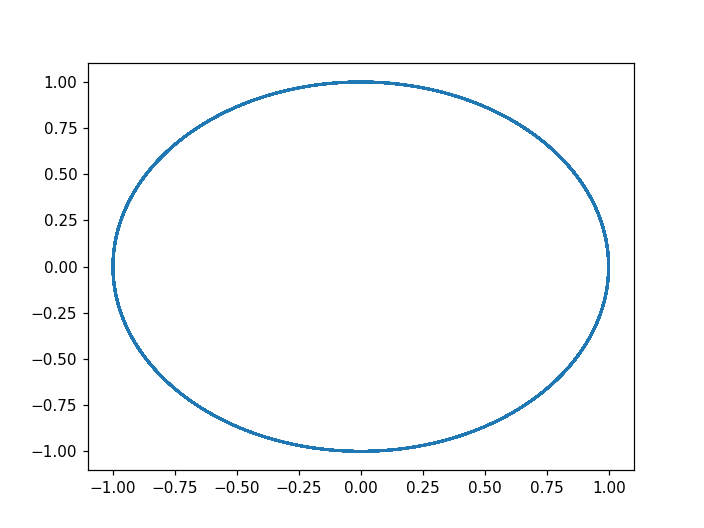

In [28]:
%matplotlib notebook
plt.plot(x,v)

In [29]:
x,v = sol.y

<IPython.core.display.Javascript object>


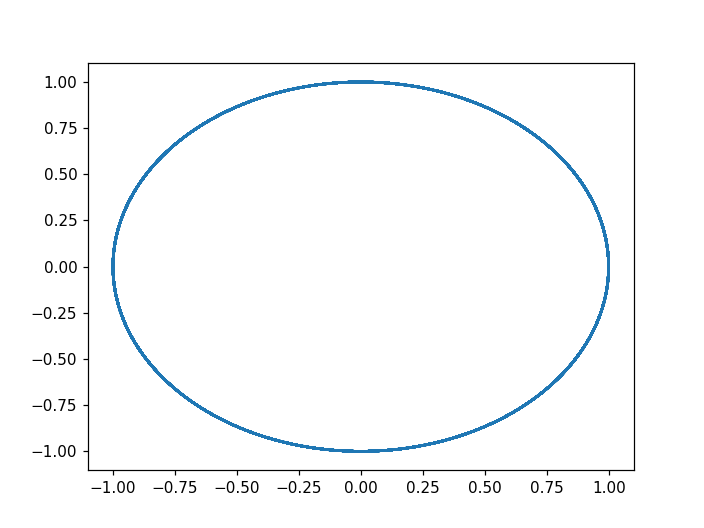

In [30]:
%matplotlib notebook
plt.plot(x,v)

# Planetenbewegung
Die Newton'sche Bewegungsgleichung für einen Massenpunkt im Zentralfeld lautet
$$m\ddot{\mathbf{r}}=-\frac{\Gamma Mm}{r^2}\frac{\mathbf{r}}{r}$$
Man kann durch $m$ dividieren und erhält
\begin{align}
\ddot{x} &= -\frac{\Gamma M}{r^2}\frac{x}{r}\\
\ddot{y} &= -\frac{\Gamma M}{r^2}\frac{y}{r}
\end{align}
Wir schreiben das ganze als System von 4 gekoppelten gewöhnlichen Differentialgleichungen 1. Ordnung
\begin{align}
\dot{x}   &= v_x\\
\dot{v}_x &= -\frac{\Gamma M}{r^3}x\\
\dot{y}   &= v_y\\
\dot{v}_y &= -\frac{\Gamma M}{r^3}y
\end{align}

Der Abstand ist $r = \sqrt{x^2+y^2}$

In [101]:
# Let's define the function
def func(t, z):
    GammaM = 6.672e-11 * 1.92e30 # G * Masse der Sonne
    Gammam1 = 6.672e-11 * 1.90e27 # G * Masse des Jupiter
    Gammam2 = 6.672e-11 * 5.97e24 # G * Masse der Erde
    x1,vx1,y1,vy1,x2,vx2,y2,vy2 = z
    r1 = np.sqrt(x1**2 + y1**2)
    r2 = np.sqrt(x2**2 + y2**2)
    r12 = np.sqrt((x1-x2)**2+(y1-y2)**2)
    dx1 = vx1
    dvx1 = -GammaM/r1**3 * x1 + Gammam2/r12**3*(x2-x1)
    dy1 = vy1
    dvy1 = -GammaM/r1**3 * y1 + Gammam2/r12**3*(y2-y1)
    dx2 = vx2
    dvx2 = -GammaM/r2**3 * x2 + Gammam1/r12**3*(x1-x2)
    dy2 = vy2
    dvy2 = -GammaM/r2**3 * y2 + Gammam1/r12**3*(y1-y2)
    return [dx1,dvx1,dy1,dvy1,dx2,dvx2,dy2,dvy2]

In [117]:
# here you integrate the DE and make a side by side plot
ti = 0.
tf = 2.0e9
r0=(778.5e9,0.,0.,13.1e3,149.6e9,0.,0.,30.0e3) # Mittlerer Abstand und Geschwindigkeit Jupiter und Erde eingetragen
t_eval = np.linspace(ti,tf,1000000)
#
sol = solve_ivp(func, [ti, tf],r0, method = 'DOP853', t_eval=t_eval, rtol = 1.e-10, atol = 1.e-12)

In [118]:
x1 = sol.y[0]
y1 = sol.y[2]
x2 = sol.y[4]
y2 = sol.y[6]
xcom = (x1+x2)/2.
ycom = (y1+y2)/2.

<IPython.core.display.Javascript object>


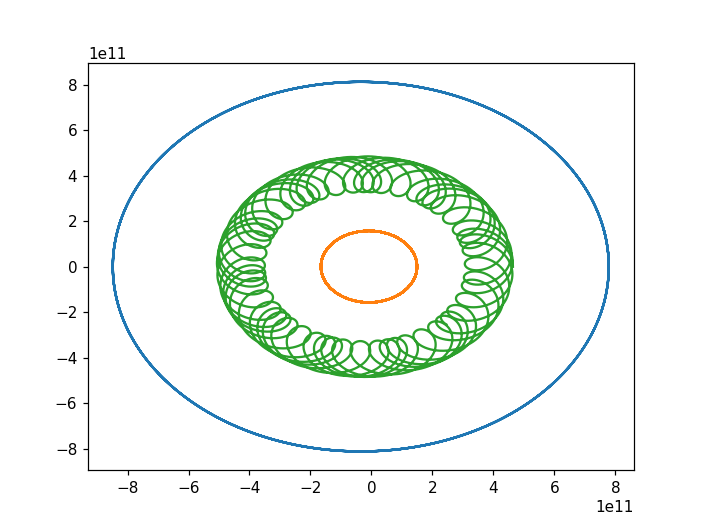

In [119]:
%matplotlib notebook
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(xcom,ycom)
plt.plot(0,0)